# Group Exercise CLV - Group 6
## CLV Calculations


#### Importing standard packages:

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

## Reading in the original data, and joining with the churn and margin predicted values: (change path in below cell)

In [2]:
import pickle
with open('combined_df.pkl', 'rb') as file:
    combined_df = pickle.load(file)
    
churn_df = pd.read_csv('churn_scores.csv')
margin_df = pd.read_csv('margin_scores.csv')

combined_df = pd.merge(combined_df, churn_df, on='acct_ID', how='left')
combined_df = pd.merge(combined_df, margin_df, on='acct_ID', how='left')

# it should be noted that Python is case sensitive for variable names.  acct_id above would fail.

combined_df.shape

(239356, 139)

## Since our margin model had transformed the target variable, we need to untransform the predicted value,
##     using the inverse of our transformation:

C:\Users\ruthv\AppData\Local\Temp\ipykernel_33100\3866578832.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['P_margin_Y_pos_1']=10**combined_df['P_log_margin_Y_pos_1']-50000


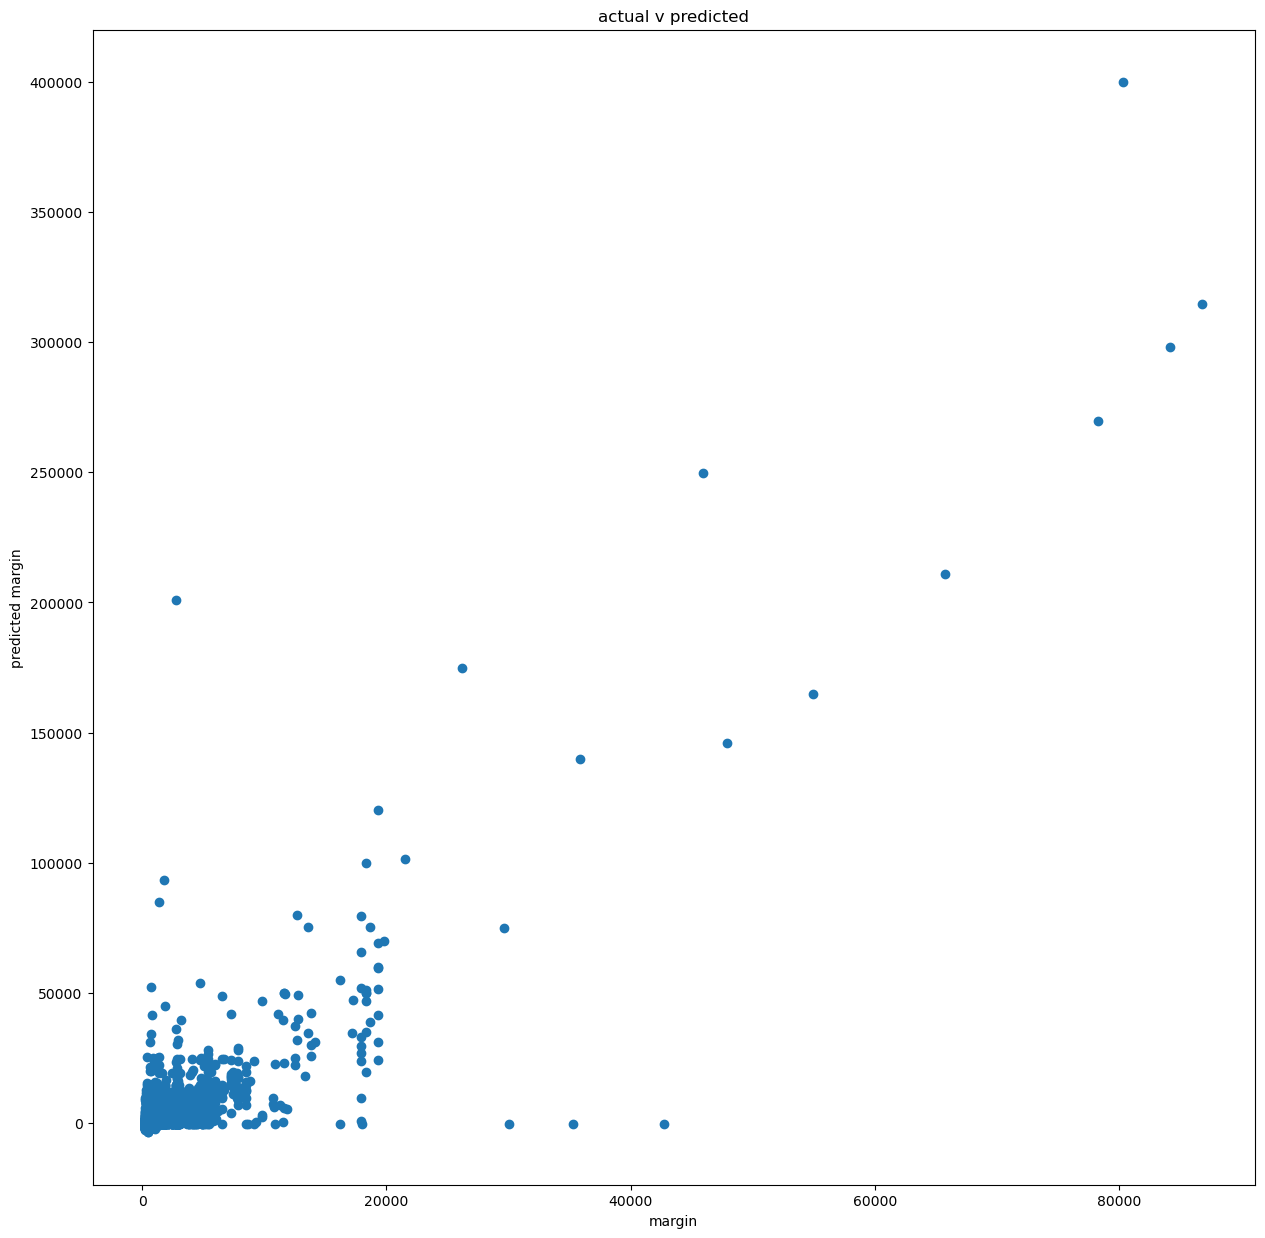

In [3]:
combined_df['P_margin_Y_pos_1']=10**combined_df['P_log_margin_Y_pos_1']-50000

# Plotting predicted untransformed values vs actual untransformed values:

plt.figure(figsize=(15,15))
plt.scatter(combined_df['P_margin_Y_pos_1'], combined_df['margin_Y_pos_1'])
plt.xlabel("margin")
plt.ylabel("predicted margin")
plt.title("actual v predicted")
# plt.xticks([])
# plt.yticks([])
print(" ") 
plt.show()

# It should be noted:  we are scoring our original data, used for modeling, only for the purposes of analysis.
##  In a "real world" situation, we would most likely be scoring a full population for which we did not actually
##  know the future churn or the future margin.

## We are using a simplified CLV formula, in which we:
###    *  are predicting only annual numbers,
###    *  are assuming that next year's annual prediction are the same values for the next 3 years,
###    *  that our future value is adequately estimated using only 3 future years.

C:\Users\ruthv\AppData\Local\Temp\ipykernel_33100\2313747104.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['CFV'] = (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**1))/((1+annual_discount_rate)**1) + (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**2))/((1+annual_discount_rate)**2) + (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**3))/((1+annual_discount_rate)**3)


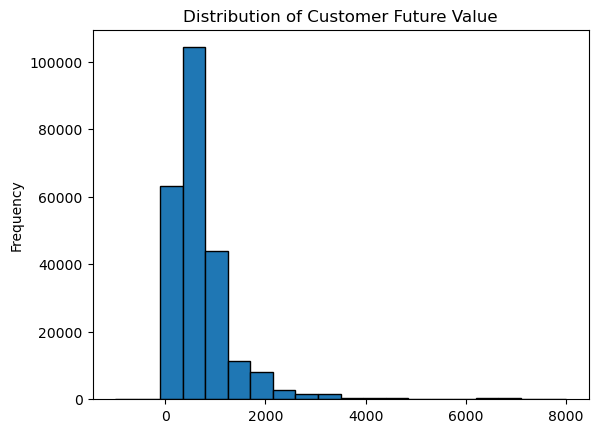

,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_avg_interval,mail_cnt_36mo,call_in_mo_36mo,...,Region_Northeast,Region_Other,Region_South,Region_Southeast,Region_Southwest,Region_West,P_churn_year_plus1_ind,P_log_margin_Y_pos_1,P_margin_Y_pos_1,CFV
count,239356.000000,239356.000000,239356.000000,239356.000000,239356.000000,239356.000000,239356.000000,239356.000000,239356.000000,239356.000000,...,239356.000000,239356.000000,239356.00000,239356.000000,239356.000000,239356.000000,239356.000000,239356.000000,239356.000000,239356.000000
mean,0.515011,0.892415,0.964079,0.092494,0.260039,2.914525,65.630738,4.918283,19.056167,7.793483,...,0.194292,0.006643,0.27058,0.161082,0.037267,0.159177,0.263808,4.702713,435.395245,773.895015
std,0.499776,0.309856,0.186095,0.289723,0.438657,3.110538,58.179621,10.070988,14.789003,47.483153,...,0.395656,0.081233,0.44426,0.367608,0.189415,0.365842,0.306884,0.004172,605.698835,1493.574364
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000005,4.701282,266.841340,1.372065
25%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,14.000000,1.000000,6.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.007895,4.701641,308.462456,324.246142
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,46.000000,1.220000,16.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.129951,4.701744,320.443980,662.245643
75%,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,110.000000,2.590000,33.000000,3.000000,...,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.403158,4.702815,444.682455,882.299940
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,290.000000,168.000000,424.000000,2670.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.995129,5.136023,86779.986971,215804.292302


In [4]:
annual_discount_rate = 0.10
combined_df['CFV'] = (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**1))/((1+annual_discount_rate)**1) + (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**2))/((1+annual_discount_rate)**2) + (combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**3))/((1+annual_discount_rate)**3)
plothist = combined_df['CFV'].plot.hist(title="Distribution of Customer Future Value",bins=20, range=(-1000,8000),edgecolor='black')
plt.show()
combined_df.describe()

## Establishing the quadrants for high/low churn and margin

In [5]:
print("mean churn: ",  np.mean(combined_df['P_churn_year_plus1_ind']))
print("median margin: %d" % (np.median(combined_df['P_margin_Y_pos_1'])))

# initializing to values which should not occur after logic below.
combined_df['retention_grp'] = '0X'
combined_df['margin_grp'] = '0X'
combined_df['quadrant_retention_margin'] = 'error_error'

combined_df.loc[combined_df['P_churn_year_plus1_ind']<np.mean(combined_df['P_churn_year_plus1_ind']),'retention_grp']="2H"
combined_df.loc[combined_df['P_churn_year_plus1_ind']>=np.mean(combined_df['P_churn_year_plus1_ind']),'retention_grp']="1L"

combined_df.loc[(combined_df['P_margin_Y_pos_1']<np.median(combined_df['P_margin_Y_pos_1'])),'margin_grp']="1L"
combined_df.loc[(combined_df['P_margin_Y_pos_1']>=np.median(combined_df['P_margin_Y_pos_1'])),'margin_grp']="2H"

combined_df.loc[(combined_df['retention_grp'] == '1L') & (combined_df['margin_grp'] == '1L'),'quadrant_retention_margin'] = "1L_1L"
combined_df.loc[(combined_df['retention_grp'] == '1L') & (combined_df['margin_grp'] == '2H'),'quadrant_retention_margin'] = "1L_2H"
combined_df.loc[(combined_df['retention_grp'] == '2H') & (combined_df['margin_grp'] == '1L'),'quadrant_retention_margin'] = "2H_1L"
combined_df.loc[(combined_df['retention_grp'] == '2H') & (combined_df['margin_grp'] == '2H'),'quadrant_retention_margin'] = "2H_2H"

mean churn:  0.2638078229107074
median margin: 320


C:\Users\ruthv\AppData\Local\Temp\ipykernel_33100\785265429.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['retention_grp'] = '0X'
C:\Users\ruthv\AppData\Local\Temp\ipykernel_33100\785265429.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_df['margin_grp'] = '0X'
C:\Users\ruthv\AppData\Local\Temp\ipykernel_33100\785265429.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

## Output scored data and go to Tableau for more analysis... (change path in below cell)

In [6]:
combined_df.to_csv('CLV_scores.csv',index=False)